### IMPORT DATASET AND BUILD MATRIX

In [40]:
import mock
import time
import os

from functions import data_recovery

date = time.strftime("%Y_%b_%d_%H_%M_%S", time.localtime(round(time.time())))

dataset_list=["satimage","pageblocks","abalone20","abalone17",\
                    "abalone8","segmentation","wine4","yeast6","yeast3",\
                    "german","vehicle","pima","balance","autompg","libras",\
                    "iono","glass","wine","hayes"]

opt = mock.Mock()
dataset_stats=[]
opt.dataset = None
for ds in dataset_list:
	setattr(opt, 'dataset', ds)
	X, y, dim = data_recovery(opt, date)
	size = X.shape[0]
	unique, counts = np.unique(y, return_counts=True)
	stat=dict(zip(unique, counts))
	if(1 in stat.keys()):
		pos_part=stat[1]/size*100
		neg_part=100-pos_part
	else:
		pos_part=0
		neg_part=100
	r_n_part=round(neg_part,2)
	r_p_part=round(pos_part,2)
	if(pos_part>0):
		r_IR=round(neg_part/r_p_part,2)
	else:
		r_IR=0
	dataset_stats.append({"dataset":ds,"size":size,"dim":dim,"pos_part":r_p_part,"neg_part":r_n_part,"IR": r_IR})



         1     2     3     4    5    6     7     8    9
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
...    ...   ...   ...   ...  ...  ...   ...   ...  ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22  ME2
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47  NUC
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  ME2
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39  NUC
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22  CYT

[1484 rows x 9 columns]
         1     2     3     4    5    6     7     8    9
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4     0.42  0.44  0.48 

In [43]:
DS=pd.DataFrame(dataset_stats)
print(DS)

         dataset  size  dim  pos_part  neg_part      IR
0       satimage  6435   36      9.73     90.27    9.28
1     pageblocks  5473   10     10.23     89.77    8.77
2      abalone20  4177   10      0.62     99.38  160.29
3      abalone17  4177   10      1.39     98.61   70.94
4       abalone8  4177   10     13.60     86.40    6.35
5   segmentation  2310   19     14.29     85.71    6.00
6          wine4  1599   11      3.31     96.69   29.21
7         yeast6  1484    8      0.00    100.00    0.00
8         yeast3  1484    8      0.00    100.00    0.00
9         german  1000   24     30.00     70.00    2.33
10       vehicle   846   18     23.52     76.48    3.25
11          pima   768    8     34.90     65.10    1.87
12       balance   625    4     46.08     53.92    1.17
13       autompg   392    7     37.50     62.50    1.67
14        libras   360   90      6.67     93.33   13.99
15          iono   351   34     35.90     64.10    1.79
16         glass   214    9     32.71     67.29 

### CHECK IMBALANCED RATE

<IPython.core.display.Javascript object>


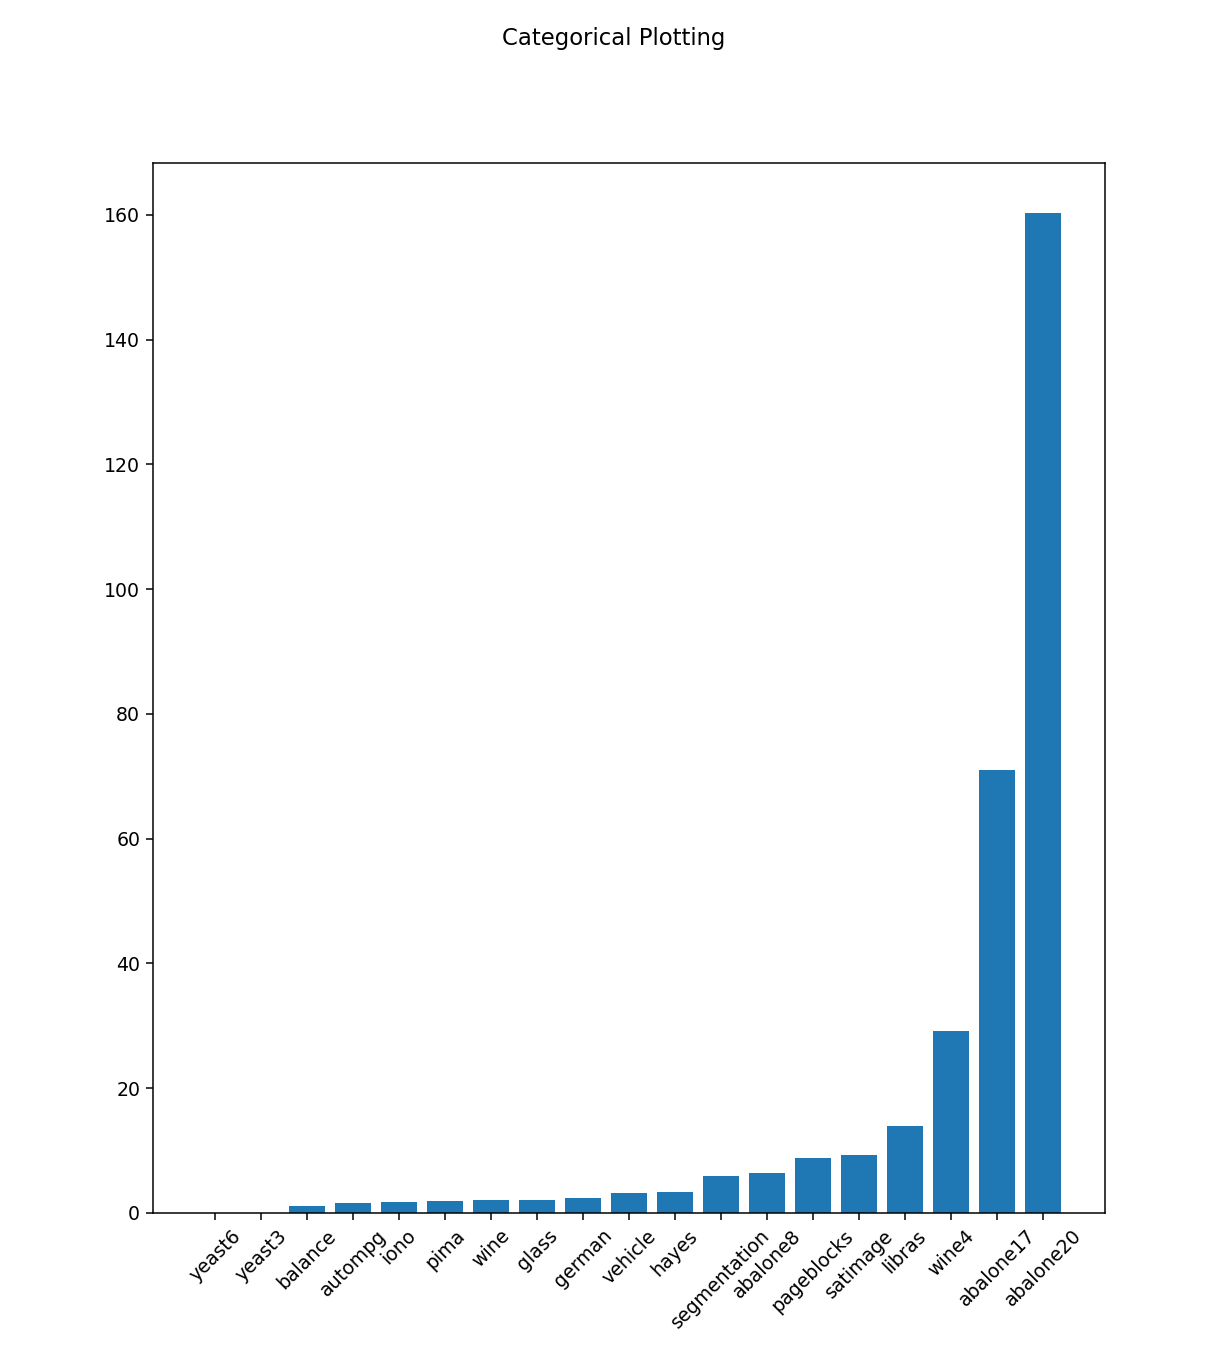

In [189]:
import matplotlib.pyplot as plt

sortedDS=DS.sort_values(by=['IR'])
names = sortedDS['dataset']
values = sortedDS['IR']

plt.figure(figsize=(9, 10))

plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.xticks(rotation=45)
plt.show()

### ANALYSIS OF Imbalance rate by dataset

In [77]:
import plotly.express as px



fig = px.scatter(DS, x="size", y="IR", text="dataset", log_x=False, size_max=100, color="pos_part")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Positive part, size and ', title_x=0.5)
fig.show()
